In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
%autosave 0

Autosave disabled


# Matplotlib

Matplotlib is the de-facto library used in Python to create visualizations.

There are two common approaches to plotting with Matplotlib.

1. The pyplot API: pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation.
2. The object-oriented API: At its core, Matplotlib is object-oriented and this interface allows more control and customization of your plots.

In this lesson, we will focus on pyplot interface only.

## Line and Scatter Charts

Convention is to import the `pyplot` module as `plt`.

`import matplotlib.pyplot as plt`

`print(plt)`

In [3]:
print(plt)

<module 'matplotlib.pyplot' from '/opt/homebrew/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>


### Line Charts

For the most basic example, we can create a sequence of numbers, then a chart (calling `.plot`), then call the `.show` method to display it.

Note that the act of creating the chart and showing it are two separate acts.

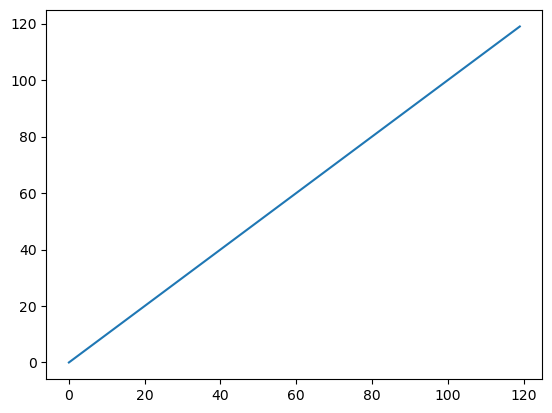

In [4]:
x = list(range(120))

plt.plot(x)
plt.show()